# Nhận dạng chữ số bằng mạng neural network

## 1 - Giới thiệu

Trong nghiên cứu này, tôi sẽ trình bày một phương pháp nhận dạng chữ số 0 - 9 bằng phương pháp neural network.

## 2 - Tập dữ liệu

Tập dữ liệu được sử dụng trong nghiên cứu này được download từ [link](https://www.kaggle.com/oddrationale/mnist-in-csv?select=mnist_test.csv). Có 2 file csv được download là mnist_train.csv và mnist_test.csv tương ứng với 2 tập dữ liệu huấn luyện và kiểm thử. Tập hợp các ảnh 28x28 của các chữ số ở định dạng thang xám (gray) sau khi được flatten (chuyển đổi từ ma trận 28x28 sang vector hàng) thì lưu trữ trong 2 file excel trên. Mỗi dòng của file csv sẽ có 2 thông số chính:
- Label chính là chữ số của bức ảnh.
- Các cột 1x1, 1x2, ... 28x28 chính là giá trị pixel của bức ảnh
Có tổng cộng 60000 bức ảnh trong tập huấn luyện và 10000 bức ảnh trong tập kiểm thử. Với tập huấn luyện thì mỗi chữ số có khoảng 6000 bức ảnh, còn với tập kiểm thử thì mỗi chữ số có khoảng 1000 bức ảnh.

In [1]:
import pandas as pd
train_data = pd.read_csv('dataset/mnist_train.csv')
x_train = train_data.loc[:, train_data.columns != 'label']
y_train = train_data['label']
test_data = pd.read_csv('dataset/mnist_test.csv')
x_test = test_data.loc[:, test_data.columns != 'label']
y_test = test_data['label']

In [2]:
train_data.head(10)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
x_train.shape

(60000, 784)

In [4]:
train_data.groupby('label').size()

label
0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
dtype: int64

In [5]:
test_data.head(10)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
x_test.shape

(10000, 784)

In [7]:
test_data.groupby('label').size()

label
0     980
1    1135
2    1032
3    1010
4     982
5     892
6     958
7    1028
8     974
9    1009
dtype: int64

In [8]:
import cv2
import matplotlib
import matplotlib.pyplot as plt

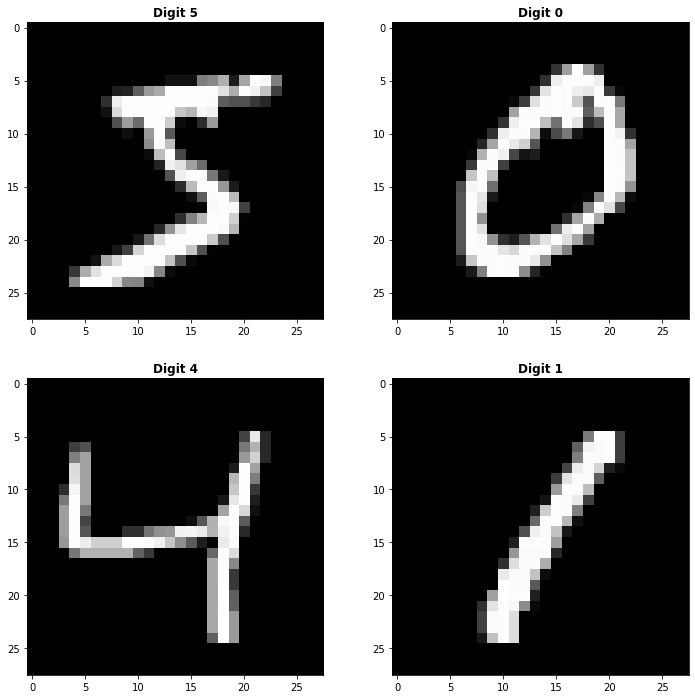

In [9]:
plt.subplots(figsize=(12,12))

idx = 0
plt.subplot(2,2,1)
plt.title('Digit '+str(y_train.iloc[idx]), fontweight ="bold")
plt.imshow(x_train.iloc[idx].to_numpy().reshape((28,28)), cmap ="binary_r", interpolation ='nearest')

idx = 1
plt.subplot(2,2,2)
plt.title('Digit '+str(y_train.iloc[idx]), fontweight ="bold")
plt.imshow(x_train.iloc[idx].to_numpy().reshape((28,28)), cmap ="binary_r", interpolation ='nearest')

idx = 2
plt.subplot(2,2,3)
plt.title('Digit '+str(y_train.iloc[idx]), fontweight ="bold")
plt.imshow(x_train.iloc[idx].to_numpy().reshape((28,28)), cmap ="binary_r", interpolation ='nearest')

idx = 3
plt.subplot(2,2,4)
plt.title('Digit '+str(y_train.iloc[idx]), fontweight ="bold")
plt.imshow(x_train.iloc[idx].to_numpy().reshape((28,28)), cmap ="binary_r", interpolation ='nearest')

plt.show()

## 3 - Packages và helper functions

In [10]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns
import numpy as np
import time

In [11]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

In [37]:
# plot confusion matrix
def plot_cm(y_true, y_pred, figsize=(15,15)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

In [13]:
# plot loss history
def plot_loss(history, epochs):
    plt.plot()
    plt.plot(range(0, epochs), history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()

In [14]:
# plot accuracy history
def plot_accuracy(history, epochs):
    plt.plot(range(0, epochs), history.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.show()

In [15]:
def convert_to_class(predict):
    predict_class = np.argmax(predict, axis=1)
    predict_class = predict_class.tolist()
    return predict_class

## 4 -  Mạng neural network 2 layer (1 hidden layer), không regularization, không optimization

Đầu tiên, chúng ta sẽ thử giải bài toán nhận dạng chữ số bằng một mạng neural đơn giản :
* 2 layers: 1 hidden layer có 28x28 = 784 neural với activation là `Relu` và 1 output layer có 10 neural (tương ứng với 10 chữ số từ 0-9) với activation là `softmax`.
* epochs = 100
* learning_rate = 0.001
* batch_size = 60000 (full batch của tập dữ liệu huấn luyện, không xài mini-batch)

### 4.1 - Hyperparameters

In [21]:
# define hyperparameters
epochs = 100
learning_rate = 0.001
batch_size = x_train.shape[0] # 60000

### 4.2 - Định nghĩa mạng neural

In [222]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(x_train.shape[1],input_dim=x_train.shape[1], activation='relu'),
	tf.keras.layers.Dense(10, activation='softmax'),
])

In [223]:
model1.compile(optimizer=tf.optimizers.SGD(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

### 4.3 - Huấn luyện mô hình

In [224]:
t = time.time()
history1 = model1.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)
elapsed = time.time() - t

model1.save('parameters/model1.h5')

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 111.7913 - accuracy: 0.1060
Epoch 2/100
1/1 [==============================] - 1s 693ms/step - loss: 230.2122 - accuracy: 0.3923
Epoch 3/100
1/1 [==============================] - 1s 622ms/step - loss: 317.0663 - accuracy: 0.2145
Epoch 4/100
1/1 [==============================] - 1s 644ms/step - loss: 254.7227 - accuracy: 0.4007
Epoch 5/100
1/1 [==============================] - 1s 658ms/step - loss: 99.7515 - accuracy: 0.4485
Epoch 6/100
1/1 [==============================] - 1s 693ms/step - loss: 60.5036 - accuracy: 0.5608
Epoch 7/100
1/1 [==============================] - 1s 759ms/step - loss: 28.4543 - accuracy: 0.6083
Epoch 8/100
1/1 [==============================] - 1s 649ms/step - loss: 24.2736 - accuracy: 0.6751
Epoch 9/100
1/1 [==============================] - 1s 688ms/step - loss: 16.0585 - accuracy: 0.7491
Epoch 10/100
1/1 [==============================] - 1s 700ms/step - loss: 8.0125 - accuracy: 0.8121

In [225]:
print('Elapsed: %s' % elapsed, 'seconds')
print('Loss @ Epoch %d:' % epochs, history1.history['loss'][epochs-1])
print('Training accuracy @ Epoch %d:' % epochs, history1.history['accuracy'][epochs-1])

Elapsed: 61.65287208557129 seconds
Loss @ Epoch 100: 1.9657090902328491
Training accuracy @ Epoch 100: 0.9099666476249695


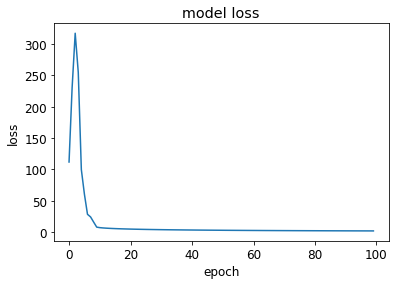

In [226]:
plot_loss(history1, epochs)

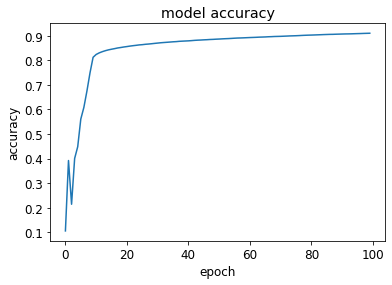

In [227]:
plot_accuracy(history1, epochs)

### 4.4 - Đánh giá độ chính xác accuracy với tập kiểm thử

In [228]:
predict = model1.predict(x_test)
y_pred1 = convert_to_class(predict)

In [229]:
# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred1)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 89.91 %.


### 4.5 - Phân tích và định hướng cải thiện mô hình

* Training:
    - Loss at epoch 100: 1.97
    - Accuracy at epoch 100: 91%
    - Training error: 100 - 91 = 8%
* Test:
    - Accuracy: 89.91%
    - Test error: 100 - 89.91 = 10.09%

Dựa vào các thông số trên, chúng ta dễ dàng nhận ra mô hình đang bị bias, hay nói cách khác, chưa được huấn luyện tốt. Như vậy, bước tiếp theo sẽ là tìm cách giảm training error. Có 2 cách có thể thử nghiệm:

1. Huấn luyện mô hình lâu hơn: tăng epochs từ 100 lên 2000

2. Tăng số lượng layers của mô hình: hiện tại chỉ có 2 layers, tăng lên 4 layers để mô hình có thể học "sâu" hơn.

Với 2 phương pháp trên, chúng ta sẽ chuẩn bị tinh thần là mô hình sẽ mất rất nhiều thời gian để huấn luyện (hiện tại là 61.65 giây để huấn luyện mô hình). Và để tăng tốc cho việc huấn luyện mô hình, các kỹ thuật optimizations như momentum, adam có thể sẽ được áp dụng.

## 5 - Huấn luyện mô hình lâu hơn: tăng epochs lên 2000

In [232]:
epochs = 2000

In [233]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(x_train.shape[1],input_dim=x_train.shape[1], activation='relu'),
	tf.keras.layers.Dense(10, activation='softmax'),
])

In [234]:
model2.compile(optimizer=tf.optimizers.SGD(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [235]:
t = time.time()
history2 = model2.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)
elapsed = time.time() - t

model2.save('parameters/model2.h5')

===================] - 1s 1s/step - loss: 0.0359 - accuracy: 0.9965
Epoch 1803/2000
1/1 [==============================] - 1s 1s/step - loss: 0.0359 - accuracy: 0.9965
Epoch 1804/2000
1/1 [==============================] - 1s 1s/step - loss: 0.0358 - accuracy: 0.9965
Epoch 1805/2000
1/1 [==============================] - 1s 1s/step - loss: 0.0357 - accuracy: 0.9966
Epoch 1806/2000
1/1 [==============================] - 1s 1s/step - loss: 0.0357 - accuracy: 0.9966
Epoch 1807/2000
1/1 [==============================] - 1s 1s/step - loss: 0.0356 - accuracy: 0.9966
Epoch 1808/2000
1/1 [==============================] - 1s 1s/step - loss: 0.0355 - accuracy: 0.9966
Epoch 1809/2000
1/1 [==============================] - 1s 1s/step - loss: 0.0355 - accuracy: 0.9966
Epoch 1810/2000
1/1 [==============================] - 1s 982ms/step - loss: 0.0354 - accuracy: 0.9966
Epoch 1811/2000
1/1 [==============================] - 1s 1s/step - loss: 0.0353 - accuracy: 0.9966
Epoch 1812/2000
1/1 [========

In [240]:
print('Elapsed: %s' % elapsed, 'seconds')
print('Loss @ Epoch %d:' % epochs, history2.history['loss'][epochs-1])
print('Training accuracy @ Epoch %d:' % epochs, history2.history['accuracy'][epochs-1])

Elapsed: 1746.6891958713531 seconds
Loss @ Epoch 2000: 0.025079121813178062
Training accuracy @ Epoch 2000: 0.9976999759674072


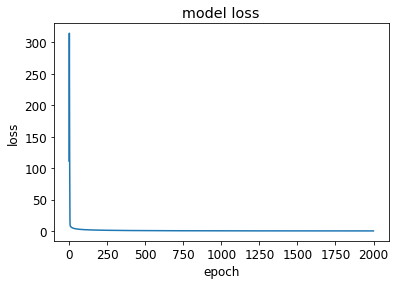

In [241]:
plot_loss(history2, epochs)

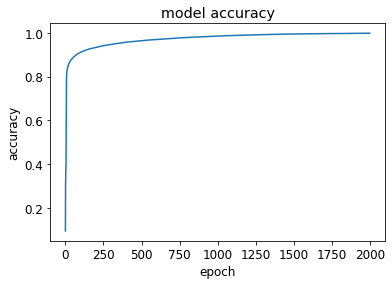

In [243]:
plot_accuracy(history2, epochs)

### 5.1 - Đánh giá độ chính xác accuracy với tập kiểm thử

In [247]:
predict2 = model2.predict(x_test)
y_pred2 = convert_to_class(predict2)

In [248]:
# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred2)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 94.1 %.


### 5.2 - Đánh giá performance của mô hình

Như vậy, sau khi mô hình được huấn luyện lâu hơn thì độ chính xác đã tăng lên đáng kể.

* Training:
    - Loss at epoch 2000: 0.025
    - Accuracy at epoch 2000: 100%
    - Training error: 0%
* Test:
    - Accuracy: 94.1%
    - Test error: 100 - 94.1 = 5.9%

Tuy nhiên, thời gian huấn luyện mô hình cũng lâu hơn trước rất nhiều: 1746.7 giây.

## 6 - Huấn luyện mô hình sâu hơn: sử dụng 4 layers

In [250]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(x_train.shape[1],input_dim=x_train.shape[1], activation='relu'),
    tf.keras.layers.Dense(x_train.shape[1],input_dim=x_train.shape[1], activation='relu'),
    tf.keras.layers.Dense(x_train.shape[1],input_dim=x_train.shape[1], activation='relu'),
	tf.keras.layers.Dense(10, activation='softmax'),
])

In [251]:
model3.compile(optimizer=tf.optimizers.SGD(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [252]:
t = time.time()
history3 = model3.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)
elapsed = time.time() - t

model3.save('parameters/model3.h5')

Epoch 1801/2000
1/1 [==============================] - 4s 4s/step - loss: 0.0183 - accuracy: 0.9976
Epoch 1802/2000
1/1 [==============================] - 4s 4s/step - loss: 0.0182 - accuracy: 0.9976
Epoch 1803/2000
1/1 [==============================] - 4s 4s/step - loss: 0.0182 - accuracy: 0.9976
Epoch 1804/2000
1/1 [==============================] - 4s 4s/step - loss: 0.0182 - accuracy: 0.9976
Epoch 1805/2000
1/1 [==============================] - 4s 4s/step - loss: 0.0182 - accuracy: 0.9976
Epoch 1806/2000
1/1 [==============================] - 4s 4s/step - loss: 0.0181 - accuracy: 0.9976
Epoch 1807/2000
1/1 [==============================] - 4s 4s/step - loss: 0.0181 - accuracy: 0.9976
Epoch 1808/2000
1/1 [==============================] - 4s 4s/step - loss: 0.0181 - accuracy: 0.9976
Epoch 1809/2000
1/1 [==============================] - 4s 4s/step - loss: 0.0181 - accuracy: 0.9976
Epoch 1810/2000
1/1 [==============================] - 4s 4s/step - loss: 0.0180 - accuracy: 0.9976


In [253]:
print('Elapsed: %s' % elapsed, 'seconds')
print('Loss @ Epoch %d:' % epochs, history3.history['loss'][epochs-1])
print('Training accuracy @ Epoch %d:' % epochs, history3.history['accuracy'][epochs-1])

Elapsed: 8307.670897245407 seconds
Loss @ Epoch 2000: 0.013771673664450645
Training accuracy @ Epoch 2000: 0.9984999895095825


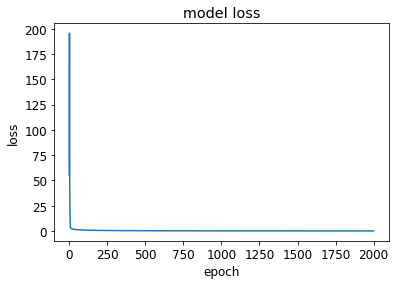

In [254]:
plot_loss(history3, epochs)

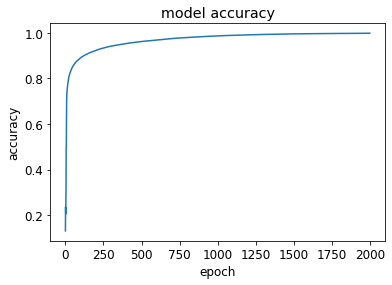

In [255]:
plot_accuracy(history3, epochs)

In [256]:
### 6.1 - Đánh giá độ chính xác accuracy với tập kiểm thử

In [257]:
predict3 = model3.predict(x_test)
y_pred3 = convert_to_class(predict3)

In [258]:
# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred3)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 93.25 %.


### 6.2 - Đánh giá performance của mô hình

* Training:
    - Loss at epoch 2000: 0.014
    - Accuracy at epoch 2000: 99.85%
    - Training error: 0.15%
* Test:
    - Accuracy: 93.25%
    - Test error: 100 - 93.25 = 6.75%

Thời gian huấn luyện mô hình cũng lâu hơn trước rất nhiều: 8307.7 giây. Và mô hình sau khi huấn luyện không hề có độ chính xác cao hơn mô hình 2 layers ở bước trước đó. Vì vậy, mô hình 2 layers sẽ được xài cho các bước tiếp sau đây.

## 7 - Tối ưu hoá mô hình

Như đã thấy ở trên, mô hình 2 layers với epochs = 2000 tốn 1746.7 (s) để huấn luyện, loss và training accuracy tại epoch 2000 lần lượt là 0.025 và 100%. Vậy có cách nào để mô hình huấn luyện nhanh hơn và vẫn giữ được độ chính xác training accuracy = 100% và test accuracy 94.1% ? Chúng ta hãy thử với 2 phương pháp optimization phổ biến là momentum và adam.

### 7.1 - Momentum

In [17]:
batch_size = 128
epochs = 1500

In [18]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(x_train.shape[1],input_dim=x_train.shape[1], activation='relu'),
	tf.keras.layers.Dense(10, activation='softmax'),
])

In [19]:
model4.compile(optimizer=tf.optimizers.SGD(learning_rate=learning_rate, momentum=0.9),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [20]:
t = time.time()
history4 = model4.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)
elapsed = time.time() - t

 - accuracy: 0.9997
Epoch 1317/1500
469/469 [==============================] - 2s 5ms/step - loss: 9.7075e-04 - accuracy: 0.9997
Epoch 1318/1500
469/469 [==============================] - 2s 5ms/step - loss: 9.7046e-04 - accuracy: 0.9997
Epoch 1319/1500
469/469 [==============================] - 2s 5ms/step - loss: 9.6960e-04 - accuracy: 0.9997
Epoch 1320/1500
469/469 [==============================] - 2s 5ms/step - loss: 9.6928e-04 - accuracy: 0.9997
Epoch 1321/1500
469/469 [==============================] - 2s 5ms/step - loss: 9.7092e-04 - accuracy: 0.9997
Epoch 1322/1500
469/469 [==============================] - 2s 4ms/step - loss: 9.8244e-04 - accuracy: 0.9997
Epoch 1323/1500
469/469 [==============================] - 2s 5ms/step - loss: 9.7448e-04 - accuracy: 0.9997
Epoch 1324/1500
469/469 [==============================] - 2s 5ms/step - loss: 9.7803e-04 - accuracy: 0.9997
Epoch 1325/1500
469/469 [==============================] - 2s 5ms/step - loss: 9.7076e-04 - accuracy: 0.9997

In [21]:
model4.save('parameters/model4.h5')

In [22]:
print('Elapsed: %s' % elapsed, 'seconds')
print('Loss @ Epoch %d:' % epochs, history4.history['loss'][epochs-1])
print('Training accuracy @ Epoch %d:' % epochs, history4.history['accuracy'][epochs-1])

Elapsed: 3133.982654094696 seconds
Loss @ Epoch 1500: 0.0009197084000334144
Training accuracy @ Epoch 1500: 0.999666690826416


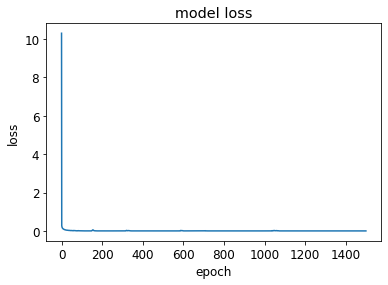

In [23]:
plot_loss(history4, epochs)

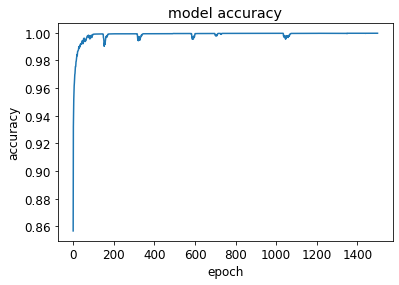

In [24]:
plot_accuracy(history4, epochs)

#### 7.1.1 - Đánh giá độ chính xác accuracy với tập kiểm thử

In [25]:
predict4 = model4.predict(x_test)
y_pred4 = convert_to_class(predict4)

# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred4)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 97.17 %.


#### 7.1.2 - Đánh giá performance của mô hình

Như vậy, với epochs = 1500 và batch size = 128, loss và accuracy của mô hình đã cải thiện đáng kể. Mô hình cũng hội tụ sớm hơn nhiều so với mô hình ban đầu (full batch và không xài optimization)

* Training:
    - Loss at epoch 1500: 0.0009
    - Accuracy at epoch 1500: 100%
    - Training error: 0%
* Test:
    - Accuracy: 97.17%
    - Test error: 100 - 97.17 = 2.83%

Tuy nhiên, thời gian huấn luyện mô hình cũng lâu hơn trước một chút: 3134 giây. Lý do dễ nhận thấy là do chúng ta xài mini batch size = 128 chứ không xài full batch cho 1 epoch như trước nữa. 

### 7.2 - Adam

In [22]:
epochs = 1500
batch_size = 128

In [23]:
model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(x_train.shape[1],input_dim=x_train.shape[1], activation='relu'),
	tf.keras.layers.Dense(10, activation='softmax'),
])

In [25]:
model5.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [26]:
t = time.time()
history5 = model5.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)
elapsed = time.time() - t

model5.save('parameters/model5.h5')

 - 2s 4ms/step - loss: 1.8171e-04 - accuracy: 0.9999
Epoch 1318/1500
469/469 [==============================] - 2s 4ms/step - loss: 1.8165e-04 - accuracy: 0.9999
Epoch 1319/1500
469/469 [==============================] - 2s 4ms/step - loss: 1.8159e-04 - accuracy: 0.9999
Epoch 1320/1500
469/469 [==============================] - 2s 4ms/step - loss: 1.8173e-04 - accuracy: 0.9999
Epoch 1321/1500
469/469 [==============================] - 2s 4ms/step - loss: 1.8170e-04 - accuracy: 0.9999
Epoch 1322/1500
469/469 [==============================] - 2s 4ms/step - loss: 1.8179e-04 - accuracy: 0.9999
Epoch 1323/1500
469/469 [==============================] - 2s 4ms/step - loss: 1.8171e-04 - accuracy: 0.9999
Epoch 1324/1500
469/469 [==============================] - 2s 4ms/step - loss: 1.8170e-04 - accuracy: 0.9999
Epoch 1325/1500
469/469 [==============================] - 2s 4ms/step - loss: 1.8180e-04 - accuracy: 0.9999
Epoch 1326/1500
469/469 [==============================] - 2s 4ms/step - lo

In [27]:
print('Elapsed: %s' % elapsed, 'seconds')
print('Loss @ Epoch %d:' % epochs, history5.history['loss'][epochs-1])
print('Training accuracy @ Epoch %d:' % epochs, history5.history['accuracy'][epochs-1])

Elapsed: 3083.488187789917 seconds
Loss @ Epoch 1500: 0.00018185676890425384
Training accuracy @ Epoch 1500: 0.9998999834060669


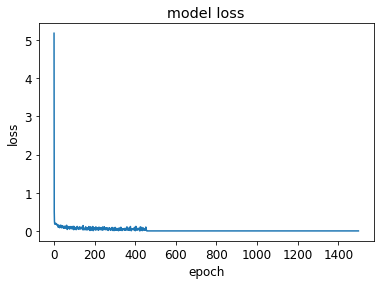

In [28]:
plot_loss(history5, epochs)

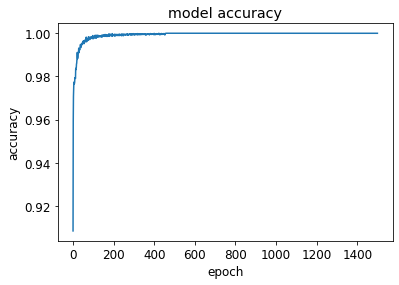

In [29]:
plot_accuracy(history5, epochs)

#### 7.2.1 - Đánh giá độ chính xác accuracy với tập kiểm thử

In [30]:
predict5 = model5.predict(x_test)
y_pred5 = convert_to_class(predict5)

# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred5)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 98.13 %.


#### 7.2.2 - Đánh giá performance của mô hình

Như vậy, với epochs = 1500 và batch size = 128, loss và accuracy của mô hình đã cải thiện đáng kể. Mô hình cũng hội tụ sớm hơn nhiều so với mô hình ban đầu (full batch và không xài optimization), cũng như mô hình có sử dụng momentum.

* Training:
    - Loss at epoch 1500: 0.00018
    - Accuracy at epoch 1500: 100%
    - Training error: 0%
* Test:
    - Accuracy: 98.13%
    - Test error: 100 - 98.13 = 1.87%

Thời gian huấn luyện mô hình: 3083 giây.

## 8 - Kiểm tra accuracy, precision, recall và f1-score với mô hình kiểm thử

In [36]:
cm = confusion_matrix(y_test, y_pred5)
 confusion_matrix(y_test, y_pred5)
cm

array([[ 970,    1,    0,    2,    1,    0,    4,    0,    2,    0],
       [   0, 1126,    3,    1,    0,    2,    2,    1,    0,    0],
       [   1,    0, 1019,    1,    1,    0,    1,    4,    5,    0],
       [   0,    0,    6,  992,    0,    5,    0,    1,    4,    2],
       [   1,    2,    4,    0,  964,    0,    1,    1,    0,    9],
       [   3,    0,    2,   10,    1,  864,    6,    2,    3,    1],
       [   1,    2,    0,    1,    2,    2,  948,    0,    2,    0],
       [   1,    2,   10,    1,    0,    0,    0, 1010,    1,    3],
       [   1,    1,    3,    5,    5,    0,    2,    2,  951,    4],
       [   2,    3,    0,    5,   16,    3,    1,    7,    3,  969]])

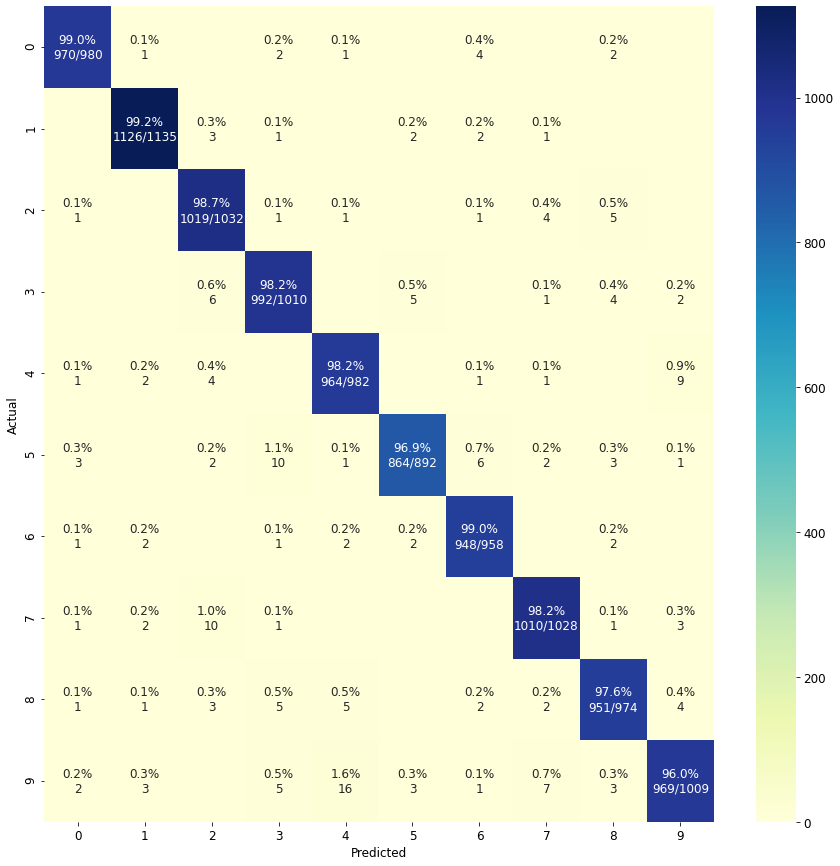

In [38]:
plot_cm(y_test, y_pred5)

In [176]:
# precision, recal and fbeta_score
precision_recall_fscore_support(y_test, y_pred1, average=None, labels=range(0,10))

(array([0.95223577, 0.96910856, 0.90523198, 0.88704966, 0.89101917,
        0.87799316, 0.92088608, 0.90401567, 0.84321608, 0.87141444]),
 array([0.95612245, 0.96740088, 0.88856589, 0.9019802 , 0.89918534,
        0.8632287 , 0.91127349, 0.89785992, 0.8613963 , 0.87314172]),
 array([0.95417515, 0.96825397, 0.89682152, 0.89445263, 0.89508363,
        0.87054833, 0.91605456, 0.90092728, 0.85220924, 0.87227723]),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))